# Machine Learning Models for a Board Game Recomendation System

 
## Team Members:
 - Cynthia Aroke
 - Kriti Bartaria
 - Jared Rubin
 
## Objective 
The goal of this project is to discover similarities between groups of games in order to create a system for recommending board games to users.

- We approach this problem through the use of unsupervised learning methods.

    - Mini batch K Means
    - Gaussian Mixture & KMeans
    - TF-IDF


- We'll implement Minibatch k-means to create a recommender system which will accept the game-id as an input from the user, and based user selection we will show the list of the game that are from the same cluster. This process will continue till user enters 'N'/'n'. 

    
- We will TF_IDF by using string features of the dataset. 

## The Dataset

Our dataset contains statistics on 20,000 boardgames scraped from boardgamegeek.com and can be found on Kaggle (https://www.kaggle.com/datasets/extralime/20000-boardgames-dataset). Our goal is to make a recomendation system that takes a board game as input and returns a list of similar games as output.

_First of all, lets import essential libraries_

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import MiniBatchKMeans
from timeit import timeit
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics.pairwise import pairwise_distances_argmin
import ast
pd.set_option('display.max_columns', None)

_Now let’s import the dataset_

In [ ]:
df = pd.read_csv('data/boardgames1.csv')
df.head()

objectid                                           name  yearpublished  \
0    174430                                     Gloomhaven           2017   
1    161936                      Pandemic Legacy  Season 1           2015   
2    167791                              Terraforming Mars           2016   
3    182028  Through the Ages  A New Story of Civilization           2015   
4    224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0          1           1           4           60          120      12   
1          2           2           4           60           60      13   
2          3           1           5          120          120      12   
3          4           2           4          120          120      14   
4          5           2           4           60          120      14   

   min_community  max_community  totalvotes playerage  languagedependence  \
0            3.0            4.0         827        14                   4   
1            4.0            4.0         549        12                   4   
2            3.0            4.0        1252        12                   3   
3            3.0            4.0         436        14                   4   
4            3.0            4.0         242        14                   1   

   usersrated  average  baverage   stddev  avgweight  numweights  \
0       31254  8.85292   8.58424  1.59819     3.8078        1311   
1       34729  8.62499   8.47159  1.59463     2.8301         971   
2       48339  8.42299   8.26781  1.36938     3.2313        1863   
3       18269  8.49419   8.23513  1.49542     4.3850         891   
4       10070  8.62031   8.20459  1.22876     3.9122         467   

   numgeeklists  numtrading  numwanting  numcomments  siteviews  numplays  \
0          3657         313        1365         5972    8933078    230213   
1          3612         272         771         5477    2971746    196621   
2          5941         277        2068         7274    4724387    245997   
3          2083         280        1049         2660    2448074     54284   
4          1039          37        1077         1702     894621     23336   

   numplays_month  news  blogs  weblink  podcast       label  \
0            3478     7    471       31      139  Board Game   
1            1090     9    597       69      164  Board Game   
2            4380    14   1158       60      148  Board Game   
3             511     5    185       30       42  Board Game   
4             815     3    124       13       21  Board Game   

   boardgamedesigner_cnt  boardgameartist_cnt  boardgamepublisher_cnt  \
0                      1                    3                       9   
1                      2                    1                      11   
2                      1                    1                      20   
3                      1                    4                      13   
4                      3                    3                       8   

   boardgamehonor_cnt  boardgamecategory_cnt  boardgamemechanic_cnt  \
0                  23                      5                     12   
1                  20                      2                      8   
2                  20                      6                      9   
3                   3                      3                      5   
4                   6                      3                      8   

   boardgameexpansion_cnt  boardgameversion_cnt  boardgamefamily_cnt  \
0                       4                    19                    7   
1                       0                    33                    3   
2                      15                    29                    6   
3                       1                    14                    2   
4                       0                     9                    6   

                                   boardgamedesigner  \
0                   

## Data Pre-Processing and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                20000 non-null  int64  
 1   name                    20000 non-null  object 
 2   yearpublished           20000 non-null  int64  
 3   sortindex               20000 non-null  int64  
 4   minplayers              20000 non-null  int64  
 5   maxplayers              20000 non-null  int64  
 6   minplaytime             20000 non-null  int64  
 7   maxplaytime             20000 non-null  int64  
 8   minage                  20000 non-null  int64  
 9   min_community           14141 non-null  float64
 10  max_community           14803 non-null  float64
 11  totalvotes              20000 non-null  int64  
 12  playerage               20000 non-null  object 
 13  languagedependence      20000 non-null  int64  
 14  usersrated              20000 non-null

Our dataset has 20,000 row and 52 columns. There are 38 numeric columns and 14 object columns. It appears that only 2 columns have missing values, however, smaple output from the dataset (see below) shows that some columns contain placeholders for null values.

In [ ]:
df['boardgameartist'][19995]

"['(Uncredited)']"

In [ ]:
df['boardgamedesigner'][19995]

'[\'(Uncredited)"\']'

In [ ]:
df['boardgameexpansion'][19995]

"['None']"

In [ ]:
df['boardgamehonor'][19995]

"['None']"

In [ ]:
df['playerage'][19995]

'(no votes)'

Because of this we began began our pre-processing by manually setting null values in the columns featured above.

A set of columns in the dataset are stored as string data types but are formmeted as lists. To quickly convert them to a list datatype we use the `ast` library. For more pre-preocessing on these list columns, please see the Appedix at the bottom of the notebook.

In [ ]:
listcols = ['boardgamedesigner','boardgameartist','boardgamepublisher','boardgamehonor','boardgamecategory',
            'boardgameversion','boardgamemechanic','boardgameexpansion','boardgamefamily']
for i in listcols:
    df[i] = df[i].apply(lambda x: ast.literal_eval(x))

Next we go through each column with abnormal nulls, locate their null value place holder, and replace it. 

In [ ]:
for col in ['boardgamedesigner','boardgameartist']:
    indies = []
    for i, row in enumerate(df[col]):
        if len(row) == 1:
            if "Uncredited" in row[0]:
                indies.append(i)
    df.loc[indies, col] = np.nan

In [ ]:
for col in ['boardgameexpansion', 'boardgamehonor']:
    indies = []
    for i, row in enumerate(df[col]):
        if len(row)==1:
            if row[0] == "None":
                indies.append(i)
    df.loc[indies, col] = np.nan

In [ ]:
indies = []
for i, row in enumerate(df['playerage']):
    if "no votes" in row:
        indies.append(i)
df.loc[indies, 'playerage'] = np.nan

## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'objectid'}>,
        <AxesSubplot:title={'center':'yearpublished'}>,
        <AxesSubplot:title={'center':'sortindex'}>,
        <AxesSubplot:title={'center':'minplayers'}>,
        <AxesSubplot:title={'center':'maxplayers'}>,
        <AxesSubplot:title={'center':'minplaytime'}>],
       [<AxesSubplot:title={'center':'maxplaytime'}>,
        <AxesSubplot:title={'center':'minage'}>,
        <AxesSubplot:title={'center':'min_community'}>,
        <AxesSubplot:title={'center':'max_community'}>,
        <AxesSubplot:title={'center':'totalvotes'}>,
        <AxesSubplot:title={'center':'languagedependence'}>],
       [<AxesSubplot:title={'center':'usersrated'}>,
        <AxesSubplot:title={'center':'average'}>,
        <AxesSubplot:title={'center':'baverage'}>,
        <AxesSubplot:title={'center':'stddev'}>,
        <AxesSubplot:title={'center':'avgweight'}>,
        <AxesSubplot:title={'center':'numweights'}>],
       [<AxesSubplot:title={'center':'num

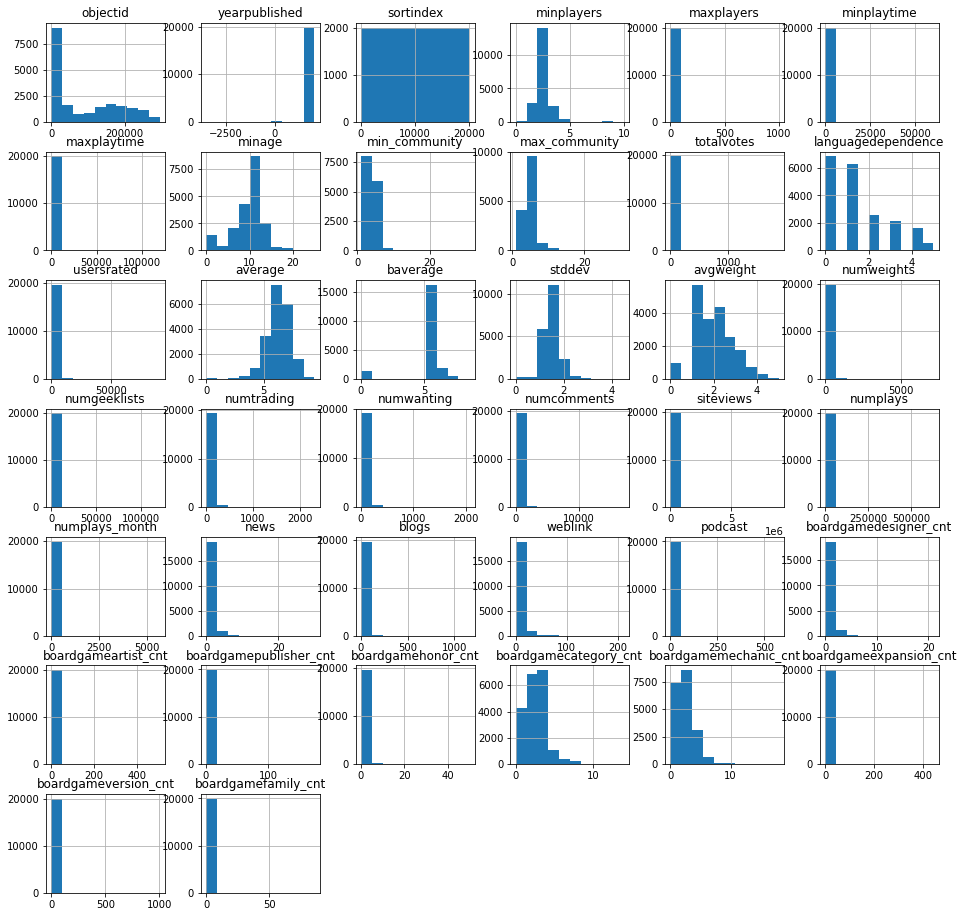

In [ ]:
df.hist(figsize = (16,16))

In [ ]:
y_id_array = df['objectid']
y_id_array

0        174430
1        161936
2        167791
3        182028
4        224517
          ...  
19995      5154
19996      5158
19997      5159
19998      5160
19999      5163
Name: objectid, Length: 20000, dtype: int64

In [ ]:
df.describe().round(decimals=2)

objectid  yearpublished  sortindex  minplayers  maxplayers  \
count   20000.00       20000.00   20000.00    20000.00    20000.00   
mean    88667.62        1981.27   10000.50        2.06        5.59   
std     90640.92         219.22    5773.65        0.75       15.05   
min         1.00       -3500.00       1.00        0.00        0.00   
25%      5858.75        1997.00    5000.75        2.00        4.00   
50%     39278.50        2008.00   10000.50        2.00        4.00   
75%    169680.50        2015.00   15000.25        2.00        6.00   
max    295770.00        2021.00   20000.00       10.00      999.00   

       minplaytime  maxplaytime    minage  min_community  max_community  \
count      20000.0     20000.00  20000.00        14141.0       14803.00   
mean          68.1        94.29      9.48            3.2           4.28   
std          466.5      1005.75      3.74            1.4           2.16   
min            0.0         0.00      0.00            1.0           1.00   
25%           20.0        30.00      8.00            2.0           3.00   
50%           30.0        45.00     10.00            3.0           4.00   
75%           60.0        90.00     12.00            4.0           5.00   
max        60000.0    120000.00     25.00           31.0          31.00   

       totalvotes  languagedependence  usersrated   average  baverage  \
count    20000.00            20000.00    20000.00  20000.00  20000.00   
mean        13.46                1.35      739.62      6.28      5.30   
std         57.17                1.40     3096.84      1.07      1.49   
min          0.00                0.00        0.00      0.00      0.00   
25%          1.00                0.00       47.00      5.71      5.50   
50%          3.00                1.00      105.00      6.35      5.55   
75%          7.00                2.00      333.25      6.96      5.67   
max       1868.00                5.00    90730.00      9.44      8.58   

         stddev  avgweight  numweights  numgeeklists  numtrading  numwanting  \
count  20000.00   20000.00    20000.00      20000.00    20000.00    20000.00   
mean       1.50       1.93       48.06        244.24       40.10       39.38   
std        0.34       0.90      198.11       1079.13       94.09      113.50   
min        0.00       0.00        0.00          0.00        0.00        0.00   
25%        1.31       1.26        4.00         24.00        4.00        2.00   
50%        1.47       1.91        9.00         59.00       12.00        8.00   
75%        1.66       2.50       25.00        178.00       35.00       26.00   
max        4.50       5.00     7104.00     121243.00     2311.00     2068.00   

       numcomments   siteviews   numplays  numplays_month      news     blogs  \
count     20000.00    20000.00   20000.00        20000.00  20000.00  20000.00   
mean        191.52    76323.53    2304.16           16.02      0.52     10.15   
std         606.89   225239.34   13625.58          111.37      1.28     38.77   
min           0.00      183.00       0.00            0.00      0.00      0.00   
25%          21.00    11634.50      55.00            0.00      0.00      0.00   
50%          44.00    23660.50     177.00            0.00      0.00      1.00   
75%         122.00    57919.75     703.25            3.00      1.00      6.00   
max       17143.00  8933078.00  627501.00         5694.00     30.00   1158.00   

        weblink   podcast  boardgamedesigner_cnt  boardgameartist_cnt  \
count  20000.00  20000.00               20000.00             20000.00   
mean       6.26      1.94                   1.34                 1.38   
std       11.05      7.96                   0.79                 4.77   
min        0.00      0.00                   0.00                 0.00   
25%        1.00      0.00                   1.00                 0.00   
50%        3.00      0.00                   1.00                 1.00   
75%        7.00      1.00                   2.00                 2.00   
max     

In [ ]:
#explore Year Published
print("Oldest game in the data was published in:", min(df["yearpublished"]))
print("Latest game in the data was published in:", max(df["yearpublished"]))

Oldest game in the data was published in: -3500
Latest game in the data was published in: 2021


In [ ]:
df.isna().sum()

objectid                      0
name                          0
yearpublished                 0
sortindex                     0
minplayers                    0
maxplayers                    0
minplaytime                   0
maxplaytime                   0
minage                        0
min_community              5859
max_community              5197
totalvotes                    0
playerage                  6398
languagedependence            0
usersrated                    0
average                       0
baverage                      0
stddev                        0
avgweight                     0
numweights                    0
numgeeklists                  0
numtrading                    0
numwanting                    0
numcomments                   0
siteviews                     0
numplays                      0
numplays_month                0
news                          0
blogs                         0
weblink                       0
podcast                       0
label   

_Dropping NA_

In [ ]:
df = df[df["min_community"].notna()]
df = df[df["max_community"].notna()]

In [ ]:
df['playerage'] = pd.to_numeric(df.playerage.astype(str).str.replace("[^0-9]",'')).fillna(0).astype(int)

In [ ]:
#Getting the age of game from year published for simplicity 
df["gameage"] =  2021-df["yearpublished"]

In [ ]:
df.head()

objectid                                           name  yearpublished  \
0    174430                                     Gloomhaven           2017   
1    161936                      Pandemic Legacy  Season 1           2015   
2    167791                              Terraforming Mars           2016   
3    182028  Through the Ages  A New Story of Civilization           2015   
4    224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0          1           1           4           60          120      12   
1          2           2           4           60           60      13   
2          3           1           5          120          120      12   
3          4           2           4          120          120      14   
4          5           2           4           60          120      14   

   min_community  max_community  totalvotes  playerage  languagedependence  \
0            3.0            4.0         827         14                   4   
1            4.0            4.0         549         12                   4   
2            3.0            4.0        1252         12                   3   
3            3.0            4.0         436         14                   4   
4            3.0            4.0         242         14                   1   

   usersrated  average  baverage   stddev  avgweight  numweights  \
0       31254  8.85292   8.58424  1.59819     3.8078        1311   
1       34729  8.62499   8.47159  1.59463     2.8301         971   
2       48339  8.42299   8.26781  1.36938     3.2313        1863   
3       18269  8.49419   8.23513  1.49542     4.3850         891   
4       10070  8.62031   8.20459  1.22876     3.9122         467   

   numgeeklists  numtrading  numwanting  numcomments  siteviews  numplays  \
0          3657         313        1365         5972    8933078    230213   
1          3612         272         771         5477    2971746    196621   
2          5941         277        2068         7274    4724387    245997   
3          2083         280        1049         2660    2448074     54284   
4          1039          37        1077         1702     894621     23336   

   numplays_month  news  blogs  weblink  podcast       label  \
0            3478     7    471       31      139  Board Game   
1            1090     9    597       69      164  Board Game   
2            4380    14   1158       60      148  Board Game   
3             511     5    185       30       42  Board Game   
4             815     3    124       13       21  Board Game   

   boardgamedesigner_cnt  boardgameartist_cnt  boardgamepublisher_cnt  \
0                      1                    3                       9   
1                      2                    1                      11   
2                      1                    1                      20   
3                      1                    4                      13   
4                      3                    3                       8   

   boardgamehonor_cnt  boardgamecategory_cnt  boardgamemechanic_cnt  \
0                  23                      5                     12   
1                  20                      2                      8   
2                  20                      6                      9   
3                   3                      3                      5   
4                   6                      3                      8   

   boardgameexpansion_cnt  boardgameversion_cnt  boardgamefamily_cnt  \
0                       4                    19                    7   
1                       0                    33                    3   
2                      15                    29                    6   
3                       1                    14                    2   
4                       0                     9                    6   

                               boardgamedesigner  \
0                 

In [ ]:
df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink',
       'gameage'],
      dtype='object')

In [ ]:
print("Columns with missing values:", df.columns[df.isnull().any()])

Columns with missing values: Index(['boardgamedesigner', 'boardgameartist', 'boardgamehonor',
       'boardgameexpansion'],
      dtype='object')


_Now let's slice the important features_

In [ ]:
# selecting only numeric feature for clustering 
df_numeric = df.select_dtypes(include=np.number)
df_numeric.head()

objectid  yearpublished  sortindex  minplayers  maxplayers  minplaytime  \
0    174430           2017          1           1           4           60   
1    161936           2015          2           2           4           60   
2    167791           2016          3           1           5          120   
3    182028           2015          4           2           4          120   
4    224517           2018          5           2           4           60   

   maxplaytime  minage  min_community  max_community  totalvotes  playerage  \
0          120      12            3.0            4.0         827         14   
1           60      13            4.0            4.0         549         12   
2          120      12            3.0            4.0        1252         12   
3          120      14            3.0            4.0         436         14   
4          120      14            3.0            4.0         242         14   

   languagedependence  usersrated  average  baverage   stddev  avgweight  \
0                   4       31254  8.85292   8.58424  1.59819     3.8078   
1                   4       34729  8.62499   8.47159  1.59463     2.8301   
2                   3       48339  8.42299   8.26781  1.36938     3.2313   
3                   4       18269  8.49419   8.23513  1.49542     4.3850   
4                   1       10070  8.62031   8.20459  1.22876     3.9122   

   numweights  numgeeklists  numtrading  numwanting  numcomments  siteviews  \
0        1311          3657         313        1365         5972    8933078   
1         971          3612         272         771         5477    2971746   
2        1863          5941         277        2068         7274    4724387   
3         891          2083         280        1049         2660    2448074   
4         467          1039          37        1077         1702     894621   

   numplays  numplays_month  news  blogs  weblink  podcast  \
0    230213            3478     7    471       31      139   
1    196621            1090     9    597       69      164   
2    245997            4380    14   1158       60      148   
3     54284             511     5    185       30       42   
4     23336             815     3    124       13       21   

   boardgamedesigner_cnt  boardgameartist_cnt  boardgamepublisher_cnt  \
0                      1                    3                       9   
1                      2                    1                      11   
2                      1                    1                      20   
3                      1                    4                      13   
4                      3                    3                       8   

   boardgamehonor_cnt  boardgamecategory_cnt  boardgamemechanic_cnt  \
0                  23                      5                     12   
1                  20                      2                      8   
2                  20                      6                      9   
3                   3                      3                      5   
4                   6                      3                      8   

   boardgameexpansion_cnt  boardgameversion_cnt  boardgamefamily_cnt  gameage  
0                       4                    19                    7        4  
1                       0                    33                    3        6  
2                      15                    29                    6        5  
3                       1                    14                    2        6  
4                       0                     9                    6        3

In [ ]:
df_numeric.columns

Index(['objectid', 'yearpublished', 'sortindex', 'minplayers', 'maxplayers',
       'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'gameage'],
      dtype='object')

In [ ]:
df_numeric.shape

(12991, 40)

<h2><center> Mini Batch K-Means </center></h2>

In [ ]:
cols = ['yearpublished', 'sortindex', 'minplayers', 'maxplayers',
       'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'gameage']

### Outlier detection

In [ ]:
# Calculate the z-scores
z_scores = stats.zscore(df_numeric[cols])
#z_scores.head()

In [ ]:
# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
df = df[filtered_entries]
df.shape

<ipython-input-164-01c0f431f67c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


(10302, 53)

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
print('Number of outliers in our dataset are:', 12991-10302)

Number of outliers in our dataset are: 2689


### Scaling the features

In [ ]:
df_clean = df_numeric
df_clean[cols] = StandardScaler().fit_transform(df_clean[cols])

<ipython-input-127-64ec355ab17e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols] = StandardScaler().fit_transform(df_clean[cols])
/Users/kriti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
df_clean

objectid  yearpublished  sortindex  minplayers  maxplayers  \
80       200680       0.493230  -1.672667   -1.839919   -0.179328   
116      233398       0.582858  -1.665477    0.058603    0.279549   
169         421      -0.851184  -1.654892    0.058603    1.197305   
181      218417       0.538044  -1.652495   -1.839919   -0.179328   
186      203420       0.493230  -1.651496   -1.839919    0.738427   
...         ...            ...        ...         ...         ...   
19882      4946      -0.268604   2.282279    0.058603    2.573938   
19887      4954      -0.358232   2.283277    0.058603    2.573938   
19952      5096      -1.344136   2.296259   -1.839919   -0.179328   
19962      5106      -0.223791   2.298257    0.058603    0.738427   
19971      5117      -0.044535   2.300054    0.058603   -1.097084   

       minplaytime  maxplaytime    minage  min_community  max_community  \
80       -0.415626     0.364481  0.674532       0.775179       0.000232   
116      -0.029393     0.109528  0.958956       0.775179       0.597987   
169       1.515538     2.404101  1.243379       0.775179       1.195743   
181      -0.029393    -0.145424  1.243379      -0.898486       0.000232   
186      -0.029393     0.364481  0.674532      -0.898486       0.000232   
...            ...          ...       ...            ...            ...   
19882     0.743073     0.364481  0.674532       0.775179       3.586764   
19887     0.743073     0.364481  0.674532       2.448844       3.586764   
19952    -0.544370    -0.485361  0.105686      -0.898486      -1.195278   
19962    -0.544370    -0.485361 -1.600855      -0.061654       1.195743   
19971     0.743073     0.364481 -0.178738      -0.898486      -1.195278   

       totalvotes  playerage  languagedependence  usersrated   average  \
80       7.466978  -0.086829            1.923314    7.495607  1.996617   
116      4.774424  -0.086829            0.378545    5.204345  2.020942   
169      6.569460  -0.086816            0.378545    4.894336  1.755948   
181      3.531707  -0.086829            1.923314    2.219070  2.522024   
186      7.466978  -0.086829            2.695699    8.321023  1.438421   
...           ...        ...                 ...         ...       ...   
19882   -0.265484  -0.086908           -1.166224   -0.178080  1.124489   
19887   -0.403563  -0.086908           -0.393840   -0.220180  1.239474   
19952   -0.541643  -0.086908           -0.393840   -0.521259 -0.204338   
19962   -0.196444   2.013052           -0.393840   -0.295450  0.227002   
19971   -0.472603  -0.086908           -0.393840   -0.396235  0.920269   

       baverage    stddev  avgweight  numweights  numgeeklists  numtrading  \
80     6.548415  0.069629   1.825321    3.113426      0.899926    1.258564   
116    6.082937 -1.493400   0.950555    1.715999      0.992700    0.381916   
169    5.697156  0.654457   2.697130    7.987785      7.347705    1.492337   
181    5.620927 -1.064108   1.055738    0.451660      0.432743    0.557246   
186    5.577079 -0.960206   0.669982    1.050557      1.055653    2.193656   
...         ...       ...        ...         ...           ...         ...   
19882  0.555307 -1.088633  -0.307010    0.019123     -0.339267   -0.455771   
19887  0.499994 -1.083762  -0.337227   -0.130601     -0.534755   -0.436290   
19952 -0.595099 -1.580953   1.205797   -0.529866     -0.408848   -0.416809   
19962 -0.127356 -1.485818  -0.956752   -0.180510     -0.276314   -0.241479   
19971 -0.140238  0.248758   1.659575   -0.263690     -0.445294   -0.416809   

       numwanting  numcomments  siteviews  numplays  numplays_month      news  \
80       4.201164     3.443236   4.406611  4.864531        7.767039  4.781278   
116      6.211120     5.916746   4.266068  3.351565        4.502578  1.591282   
169      6.616637     6.189525   7.749285  3.248041        2.362542  3.717946   
181      3.742753     1.612377   1.855201  2.357410        3.015435  0.527950   
186      1.785691     4.492744   1.865853  2.2

### We have to find the optimal K value for clustering the data.

- Use **Mini-batch K-Means** test the model performance for 100 number of clusters
- Will start with 2 clusters
- Using 100 batch samples for each iteration
- “init” argument is the method for initializing the centroid. We calculated the inertia value for each K value. Now we have to plot the inertia with K value

In [ ]:
# Create k-mean object
mini_inertias = []
minimodel = []
for k in range(2, 101):
    kminimeans = MiniBatchKMeans(n_clusters=k, init = 'k-means++', random_state=42, batch_size=100)
    kminimeans.fit(df_clean)
    
    minimodel.append(kminimeans.fit(df_clean))
    
    mini_inertias.append(kminimeans.inertia_)

In [ ]:
len(mini_inertias)

99

- Now we are using the **Elbow method** to find the optimal K value

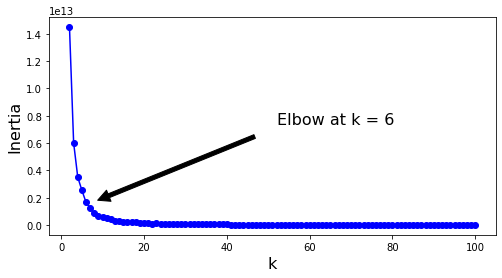

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 101), mini_inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
#plt.axvline(x=5, color='r', linestyle='--', label='optimal no. of cluster')
plt.annotate('Elbow at k = 6',
             xy=(4, mini_inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

**The elbow method does not appear to be useful, as we are unable recognize the optimal 'K'. So, let's use the Silhouette method.**

- Now we will use the **Silhouette method** to find the optimal K value

In [ ]:
mini_silhouette_scores = [silhouette_score(df_clean, model.labels_) for model in minimodel]

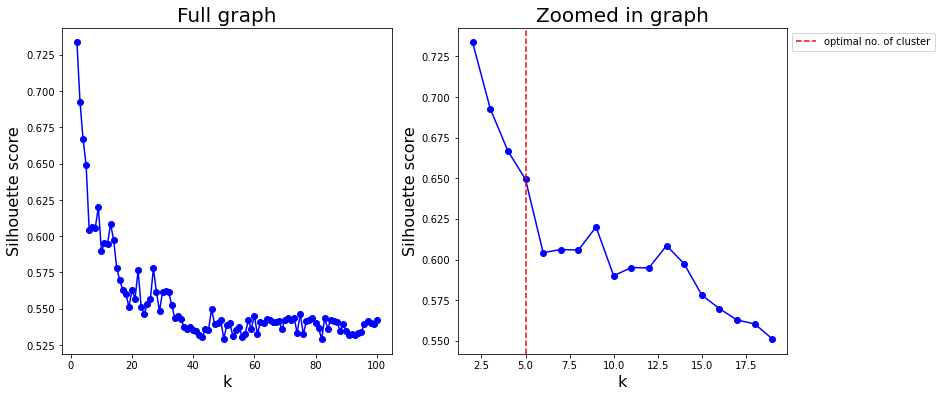

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))

axs[0].plot(range(2, 101), mini_silhouette_scores, "bo-")
axs[0].set_xlabel("k", fontsize=16)
axs[0].set_ylabel("Silhouette score", fontsize=16)
axs[0].set_title('Full graph', fontsize=20)


axs[1].plot(range(2, 20), mini_silhouette_scores[:18], "bo-")
axs[1].set_xlabel("k", fontsize=16)
axs[1].axvline(x=5, color='r', linestyle='--', label='optimal no. of cluster')
axs[1].set_ylabel("Silhouette score", fontsize=16)
axs[1].legend(bbox_to_anchor=(1.0, 1), loc='upper left')
axs[1].set_title('Zoomed in graph', fontsize=20)

plt.show()

Now we will try to visualize the cluster segmentation using **silhouette diagrams**

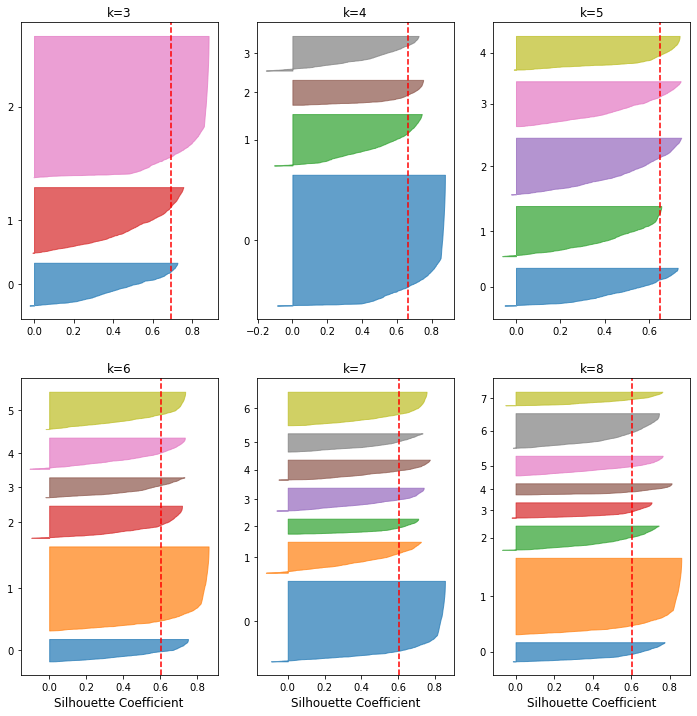

In [ ]:
plt.figure(figsize=(12, 12))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(2, 3, k - 2)
    
    y_pred = minimodel[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_clean, y_pred)

    padding = len(df_clean) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.tab10(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (6, 7, 8):
        plt.xlabel("Silhouette Coefficient", fontsize=12)
        
    plt.axvline(x=mini_silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("k={}".format(k), fontsize=12)

plt.show()

**The silhouette metric proved to be very useful in this scenario : as shown in the silhouette graph above, the cluster division is most uniform when k = 5, so we will use K = 5 as the optimal value for further processing.**

In [ ]:
kmeanModel = MiniBatchKMeans(n_clusters=5, init = 'k-means++', random_state=42, batch_size=100)
kmeanModel.fit(df_clean)
mbk_means_cluster_centers = np.sort(kmeanModel.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(df_clean, mbk_means_cluster_centers)

print(len(mbk_means_labels))

10302


In [ ]:
'''
#Getting the Centroids
label = kmeanModel.fit_predict(df_clean.values)
centroids = kmeanModel.cluster_centers_
u_labels = np.unique(label)
u_labels
'''

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
# Creating a new column in data for storing the associated cluster values
df_clean['Cluster'] = mbk_means_labels

<ipython-input-140-e0869c81b7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = mbk_means_labels


In [ ]:
df_clean['Cluster']

80       3
116      3
169      0
181      3
186      3
        ..
19882    0
19887    0
19952    0
19962    0
19971    0
Name: Cluster, Length: 10302, dtype: int64

In [ ]:
df_clean['Cluster'].value_counts()

0    4818
2    1893
3    1399
1    1275
4     917
Name: Cluster, dtype: int64

In [ ]:
# When we merge the dataframe for a single game multiple rows were created so a single game is allotted
# to many clusters so here we allot a single cluster to a movie 
# the Cluster which occurs maximum number of times is alloted to the movie  
e = []
def fi(group):
    a = pd.DataFrame(group)
    b = pd.DataFrame(a['Cluster'].value_counts())
    d = a.index 
    c = [a['objectid'][d[0]],int(b.idxmax())]
    e.append(c)

In [ ]:
df_clean.groupby("objectid").apply(lambda x: fi(x))

Empty DataFrame
Columns: []
Index: []

In [ ]:
e = pd.DataFrame(e)
e.head()

0  1
0  2  0
1  4  0
2  6  0
3  7  0
4  8  0

In [ ]:
# Adjusting the swapped column names
e.rename(columns = {0:'objectid',1:'Cluster'},inplace=True)
e.drop_duplicates(inplace=True)
e

objectid  Cluster
0             2        0
1             4        0
2             6        0
3             7        0
4             8        0
...         ...      ...
10297    291183        4
10298    292032        4
10299    292033        4
10300    292034        4
10301    294693        4

[10302 rows x 2 columns]

In [ ]:
new_data = pd.merge(e , df , how='outer', on='objectid')

In [ ]:
new_data

objectid  Cluster                                               name  \
0             2        0                                       Dragonmaster   
1             4        0                                Tal der K\u00f6nige   
2             6        0                                 Mare Mediterraneum   
3             7        0                                          Cathedral   
4             8        0                                  Lords of Creation   
...         ...      ...                                                ...   
10297    291183        4  The StoryMaster's Tales \Weirding Woods\ Hybri...   
10298    292032        4      Funkoverse Strategy Game  Harry Potter 4-Pack   
10299    292033        4                Funkoverse Strategy Game  DC 2-Pack   
10300    292034        4                Funkoverse Strategy Game  DC 4-Pack   
10301    294693        4                                        Nokosu Dice   

       yearpublished  sortindex  minplayers  maxplayers  minplaytime  \
0          -1.075253  -1.012977    1.957125   -0.179328    -0.415626   
1          -0.582301  -0.806062    0.058603   -0.179328    -0.029393   
2          -0.716743   0.106879    0.058603    0.738427     2.288004   
3          -1.209695  -1.344120    0.058603   -1.097084    -0.544370   
4          -0.537487  -0.181723    0.058603    0.279549     0.743073   
...              ...        ...         ...         ...          ...   
10297       0.627672   0.553862   -1.839919    0.279549    -0.029393   
10298       0.627672  -0.542825    0.058603   -0.179328    -0.544370   
10299       0.627672   0.079317    0.058603   -1.097084    -0.544370   
10300       0.627672  -0.248831    0.058603   -0.179328    -0.544370   
10301       0.493230   0.392884    1.957125   -0.179328    -0.222509   

       maxplaytime    minage  min_community  max_community  totalvotes  \
0        -0.400377  0.674532       0.775179       0.000232   -0.403563   
1        -0.145424  0.674532      -0.061654       0.000232    0.010676   
2         1.384291  0.674532       0.775179       1.195743   -0.472603   
3        -0.485361 -0.463161      -0.898486      -1.195278    0.977233   
4         0.364481  0.674532       0.775179       0.597987   -0.403563   
...            ...       ...            ...            ...         ...   
10297     1.894196 -0.747585      -0.061654       0.597987   -0.334524   
10298    -0.145424  0.105686      -0.898486      -1.195278   -0.472603   
10299    -0.145424  0.105686      -0.898486      -1.195278   -0.541643   
10300    -0.145424  0.105686      -0.898486      -1.195278   -0.472603   
10301    -0.145424  0.105686       0.775179       0.000232   -0.541643   

       playerage  languagedependence  usersrated   average  baverage  \
0      -0.086908            0.378545    0.115344  0.153045  0.435195   
1      -0.086829           -0.393840   -0.146186  0.159050  0.072488   
2      -0.086829            0.378545   -0.463850  0.067330 -0.465822   
3      -0.086855           -0.393840    3.377459  0.032660  1.679101   
4      -0.086908           -0.393840   -0.317138 -0.432832 -0.377985   
...          ...                 ...         ...       ...       ...   
10297  -0.086868           -1.166224   -0.488089  2.279702 -0.549412   
10298  -0.086908           -1.166224   -0.396235  1.005971 -0.188191   
10299  -0.086908           -1.166224   -0.511053  1.452274 -0.459841   
10300  -0.086842            0.378545   -0.452368  0.752787 -0.352575   
10301  -0.086908           -1.166224   -0.517432  0.958698 -0.524604   

         stddev  avgweight  numweights  numgeeklists  numtrading  numwanting  \
0     -0.095861  -0.127633    0.351844      1.184874    0.654651    0.657295   
1     -1.045767   0.777222   -0.047421      0.237256   -0.027187    0.498614   
2      0.700796   1.205797   -0.430050     -0.306134   -0.689544    0.004941   
3     -0.629691  -0.330669    3.978500      4.985286    4.317094    0.992288   
4     -0.834743   0.434285   -0.296962 

##### We now create a recommender system to recommend board games that one might like.

In [ ]:
#This function select the cluster for a user according the the user choice
def select_games():
    global l
    print( 'Select the game id you would like to play:\n')
    l=[]
    for i in range(15):
        l.append(random.randint(0,10302))
    for i in l:
        print("{:8d} ----> {}".format(new_data['objectid'][i], new_data['name'][i]))
    print('─' * 100)
    l = int(input())
    l = new_data['Cluster'][new_data.objectid == l]

In [ ]:
# This is the main function which recommends you games
def recommender():
    flag = False
    while not flag:
        select_games()
        print(new_data['name'][new_data.Cluster == int(l)].sample(n=10))
        print('─' * 100)
        print('Do you like these games(y/n) ?')
        a = input()
        while ((a =='y') or (a == 'Y')):          
            print(new_data['name'][new_data.Cluster == int(l)].sample(n=10))
            print('─' * 100)
            print('Want more(y/n) !')
            a = input()
            if ((a =='N') or (a == 'n')):
                flag = True

## Let's recommend the games.
* To experiment with the recommender, use the following method. It should keep working until you press the 'n'/'N' key.

In [ ]:
recommender()

Select the game id you would like to play:

   94073 ----> Hit the Deck
  260605 ----> Camel Up (Second Edition)
  175334 ----> The Undercity  An Iron Kingdoms Adventure Board Game
  274638 ----> Unmatched  Robin Hood vs. Bigfoot
  191438 ----> North American Railways
    2322 ----> Malefiz
  179251 ----> Urban Operations
    8943 ----> Superfection
   71074 ----> Expedition  Northwest Passage
   12274 ----> Bloody Legacy \/ Das blutige Erbe
  270632 ----> Bon Appetit!
  245931 ----> N\u0113t\u0101-Tanka  Deluxe Edition
   39029 ----> Castle Builders
    8079 ----> MLB SportsClix
  147030 ----> World of Tanks  Rush
────────────────────────────────────────────────────────────────────────────────────────────────────
8079
4227                   Legends of the High Seas
3823                          Vietnam Solitaire
4192                                    LeCardo
3705                                      Hoyuk
2275                          Replay Basketball
3662                           

<h2><center>GaussianMixture & KMeans</center></h2>

#### We now create our GMM and perform PCA so that we can compare PCA plots for objectid, KMeans, and GMM.

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


seed = 613
kGMM = 5

kmeanModel = KMeans(n_clusters=5, random_state = seed)
kmeanModel.fit(df_clean)
y_cluster_kmeans = kmeanModel.predict(df_clean)
y_cluster_kmeans

model = GaussianMixture(n_components = kGMM, random_state = seed)
model.fit(df_clean)
yhatGMM = model.predict(df_clean)
yhatGMM

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#PCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt


pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(df_clean)
X_pca_scaled = pd.DataFrame(X_pca_scaled, columns=['PC1','PC2'])

def plotData(df, groupby, clusters):

    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(clusters-1)), # cmap maps a number to a color
                     #label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of BGG Dataset");

In [ ]:
X_pca_scaled.sample(5)

PC1       PC2
10013 -1.556251  1.506372
9380  -2.986402  3.417241
10000 -3.324977  0.498507
3870  -0.006569 -1.363606
4297  -0.425555 -1.437597

In [ ]:
df_plot = X_pca_scaled.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['objectid'] = y_id_array
df_plot['ClusterGMM'] = yhatGMM

df_plot = df_plot[df_plot['objectid'].notna()]
df_plot.sample(5)

PC1       PC2  ClusterKmeans  objectid  ClusterGMM
4627 -0.463977  1.030988              0        63           1
2031  1.481981  1.849519              0      4249           1
6021 -1.712458 -3.128493              1    192274           4
7665 -2.065850 -1.250820              3    204504           4
2566 -0.147316 -3.158982              1    248117           4

Now we plot the plots below, comparing them. Right now, our objectid plot seems to provide trivial results, but our interpretation is that KMeans and GMM captures some information from the dataset and creates clusters that better represent the board games themselves. GMM seems to cluster the best.

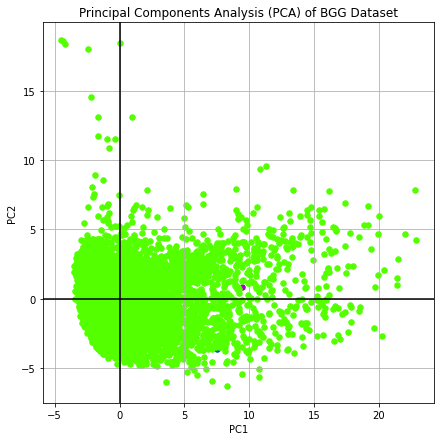

In [ ]:
plotData(df_plot, 'objectid', 5)

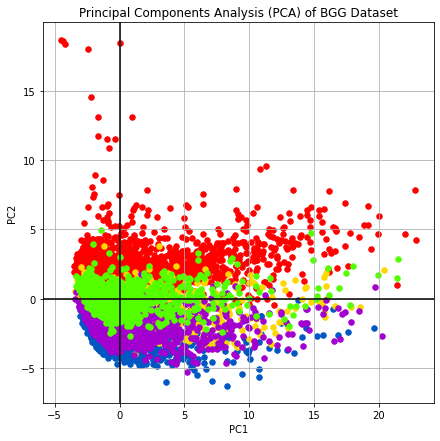

In [ ]:
plotData(df_plot, 'ClusterKmeans', 5)

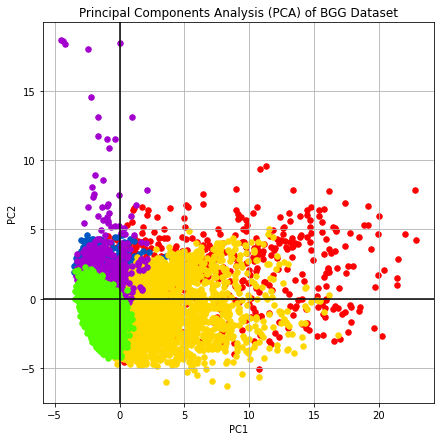

In [ ]:
plotData(df_plot, 'ClusterGMM', 5)

***Takeaway - Because we removed outliers and scaled the dataset before clustering, the mini-batch kMeans algorithm performs best for our dataset.***

<h2><center> TD-IDF </center></h2>

In [ ]:
#having a fresh start
df_new = pd.read_csv('./data/boardgames1.csv')
df_new.head()

objectid                                           name  yearpublished  \
0    174430                                     Gloomhaven           2017   
1    161936                      Pandemic Legacy  Season 1           2015   
2    167791                              Terraforming Mars           2016   
3    182028  Through the Ages  A New Story of Civilization           2015   
4    224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0          1           1           4           60          120      12   
1          2           2           4           60           60      13   
2          3           1           5          120          120      12   
3          4           2           4          120          120      14   
4          5           2           4           60          120      14   

   min_community  max_community  totalvotes playerage  languagedependence  \
0            3.0            4.0         827        14                   4   
1            4.0            4.0         549        12                   4   
2            3.0            4.0        1252        12                   3   
3            3.0            4.0         436        14                   4   
4            3.0            4.0         242        14                   1   

   usersrated  average  baverage   stddev  avgweight  numweights  \
0       31254  8.85292   8.58424  1.59819     3.8078        1311   
1       34729  8.62499   8.47159  1.59463     2.8301         971   
2       48339  8.42299   8.26781  1.36938     3.2313        1863   
3       18269  8.49419   8.23513  1.49542     4.3850         891   
4       10070  8.62031   8.20459  1.22876     3.9122         467   

   numgeeklists  numtrading  numwanting  numcomments  siteviews  numplays  \
0          3657         313        1365         5972    8933078    230213   
1          3612         272         771         5477    2971746    196621   
2          5941         277        2068         7274    4724387    245997   
3          2083         280        1049         2660    2448074     54284   
4          1039          37        1077         1702     894621     23336   

   numplays_month  news  blogs  weblink  podcast       label  \
0            3478     7    471       31      139  Board Game   
1            1090     9    597       69      164  Board Game   
2            4380    14   1158       60      148  Board Game   
3             511     5    185       30       42  Board Game   
4             815     3    124       13       21  Board Game   

   boardgamedesigner_cnt  boardgameartist_cnt  boardgamepublisher_cnt  \
0                      1                    3                       9   
1                      2                    1                      11   
2                      1                    1                      20   
3                      1                    4                      13   
4                      3                    3                       8   

   boardgamehonor_cnt  boardgamecategory_cnt  boardgamemechanic_cnt  \
0                  23                      5                     12   
1                  20                      2                      8   
2                  20                      6                      9   
3                   3                      3                      5   
4                   6                      3                      8   

   boardgameexpansion_cnt  boardgameversion_cnt  boardgamefamily_cnt  \
0                       4                    19                    7   
1                       0                    33                    3   
2                      15                    29                    6   
3                       1                    14                    2   
4                       0                     9                    6   

                                   boardgamedesigner  \
0                   

In [ ]:
#might rename cols for easy access
for i in list(df_new.columns)[32:50]:
    print(i.replace('boardgame', ''))

designer_cnt
artist_cnt
publisher_cnt
honor_cnt
category_cnt
mechanic_cnt
expansion_cnt
version_cnt
family_cnt
designer
artist
publisher
honor
category
version
mechanic
expansion
family


In [ ]:
tdf = pd.DataFrame(df_new['boardgamedesigner_cnt'].value_counts())#.transpose()
tdf.head()

boardgamedesigner_cnt
1                  14448
2                   3866
3                    944
0                    383
4                    211

In [ ]:
tdf.reset_index(inplace=True)

In [ ]:
tdf.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   index                  15 non-null     int64
 1   boardgamedesigner_cnt  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


<AxesSubplot:xlabel='index'>

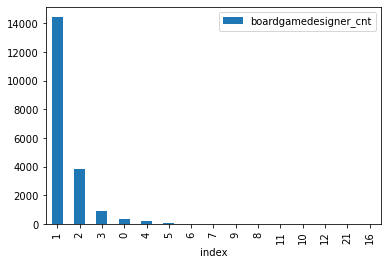

In [ ]:
tdf.plot(x = 'index', y = 'boardgamedesigner_cnt', kind = 'bar')

In [ ]:
for i in list(df_new.columns)[32:41]:
    print(i, df_new[i].nunique())

boardgamedesigner_cnt 15
boardgameartist_cnt 59
boardgamepublisher_cnt 76
boardgamehonor_cnt 32
boardgamecategory_cnt 15
boardgamemechanic_cnt 17
boardgameexpansion_cnt 87
boardgameversion_cnt 108
boardgamefamily_cnt 31


In [ ]:
df_new['boardgamecategory'] = df_new['boardgamecategory'].apply(lambda x: ast.literal_eval(x))

In [ ]:
df_new['boardgamecategory'].tolist()

[['Adventure', 'Exploration', 'Fantasy', 'Fighting', 'Miniatures'],
 ['Environmental', 'Medical'],
 ['Economic',
  'Environmental',
  'Industry / Manufacturing',
  'Science Fiction',
  'Space Exploration',
  'Territory Building'],
 ['Card Game', 'Civilization', 'Economic'],
 ['Economic', 'Industry / Manufacturing', 'Transportation'],
 ['Civilization',
  'Economic',
  'Negotiation',
  'Political',
  'Science Fiction',
  'Space Exploration'],
 ['Modern Warfare', 'Political', 'Wargame'],
 ['Fighting',
  'Miniatures',
  'Movies / TV / Radio theme',
  'Science Fiction',
  'Wargame'],
 ['Civilization',
  'Economic',
  'Science Fiction',
  'Space Exploration',
  'Territory Building'],
 ['Economic', 'Fighting', 'Science Fiction', 'Territory Building'],
 ['American West', 'Animals'],
 ['Adventure',
  'Fantasy',
  'Fighting',
  'Miniatures',
  'Novel-based',
  'Territory Building'],
 ['Age of Reason',
  'Environmental',
  'Fantasy',
  'Fighting',
  'Mythology',
  'Territory Building'],
 ['Civili

In [ ]:
cat_dic = dict()
for li in df_new['boardgamecategory'].tolist():
    for cat in li:
        if cat in cat_dic:
            cat_dic[cat] +=1
        else:
            cat_dic[cat] = 1

dict(list(cat_dic.items())[0:5])

{'Adventure': 1017,
 'Exploration': 792,
 'Fantasy': 2361,
 'Fighting': 1565,
 'Miniatures': 925}

In [ ]:
df_new['boardgamefamily'] = df_new['boardgamefamily'].apply(lambda x: ast.literal_eval(x))
fam_dic = dict()
for li in df_new['boardgamefamily'].tolist():
    for fam in li:
        if fam in fam_dic:
            fam_dic[fam] +=1
        else:
            fam_dic[fam] = 1

dict(list(fam_dic.items())[0:5])

{'Campaign Games': 115,
 'Components: Miniatures': 293,
 'Crowdfunding: Kickstarter': 2334,
 'Dungeon Crawler': 89,
 'Gloomhaven Universe': 3}

In [ ]:
famsub = { key:value for (key,value) in fam_dic.items() if ':' in key}

dict(list(famsub.items())[0:5])
#there are subcategory groups in family, these can be parsed out

{'Components: Miniatures': 293,
 'Crowdfunding: Kickstarter': 2334,
 'Planets: Mars': 20,
 'Cities: Birmingham (England)': 1,
 'Country: England': 103}

In [ ]:
df_new['boardgamedesigner'] = df_new['boardgamedesigner'].apply(lambda x: ast.literal_eval(x))
des_dic = dict()
for li in df_new['boardgamedesigner'].tolist():
    for des in li:
        if des in des_dic:
            des_dic[des] +=1
        else:
            des_dic[des] = 1

dict(list(des_dic.items())[0:5])

{'Isaac Childres"': 4,
 'Rob Daviau"': 48,
 'Matt Leacock"': 19,
 'Jacob Fryxelius"': 3,
 'Vlaada Chv\\u00e1til"': 27}

In [ ]:
print(df_new['boardgamehonor'][1])

['2015 Cardboard Republic Immersionist Laurel Nominee', '2015 Cardboard Republic Immersionist Laurel Winner', '2015 Golden Geek Best Innovative Board Game Winner', '2015 Golden Geek Best Strategy Board Game Nominee', '2015 Golden Geek Best Strategy Board Game Winner', '2015 Golden Geek Best Thematic Board Game Nominee']


In [ ]:
#string to list
import ast
ex = ast.literal_eval(df_new['boardgamehonor'][1])
print(ex)

['2015 Cardboard Republic Immersionist Laurel Nominee', '2015 Cardboard Republic Immersionist Laurel Winner', '2015 Golden Geek Best Innovative Board Game Winner', '2015 Golden Geek Best Strategy Board Game Nominee', '2015 Golden Geek Best Strategy Board Game Winner', '2015 Golden Geek Best Thematic Board Game Nominee']


In [ ]:
#see it's a list now
type(ex)

list

In [ ]:
type(df_new['boardgameartist'][1])

str

In [ ]:
type(df_new['boardgamefamily'][1]) 

list

In [ ]:
dfListTexts = df_new[['objectid', 'boardgamedesigner','boardgameartist','boardgamepublisher','boardgamehonor','boardgamecategory','boardgameversion','boardgamemechanic','boardgameexpansion','boardgamefamily']]
dfListTexts.head()

objectid                              boardgamedesigner  \
0    174430                              [Isaac Childres"]   
1    161936                   [Rob Daviau", Matt Leacock"]   
2    167791                             [Jacob Fryxelius"]   
3    182028                         [Vlaada Chv\u00e1til"]   
4    224517  [Gavan Brown", Matt Tolman", Martin Wallace"]   

                                     boardgameartist  \
0  ['Alexandr Elichev', 'Josh T. McDowell', 'Alva...   
1                                ['Chris Quilliams']   
2                                ['Isaac Fryxelius']   
3  ['Filip Murmak', 'Radim Pech', 'Jakub Politzer...   
4  ['Lina Cossette', 'David Forest', 'Damien Mamm...   

                                  boardgamepublisher  \
0  ['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...   
1  ['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...   
2  ['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...   
3  ['Czech Games Edition', 'Cranio Creations', 'D...   
4  ['Roxley', 'BoardM Factory', 'Conclave Editora...   

                                      boardgamehonor  \
0  ['2017 Best Science Fiction or Fantasy Board G...   
1  ['2015 Cardboard Republic Immersionist Laurel ...   
2  ['2016 Cardboard Republic Architect Laurel Nom...   
3  ['2015 Golden Geek Best Strategy Board Game No...   
4  ['2018 Golden Geek Best Board Game Artwork & P...   

                                   boardgamecategory  \
0  [Adventure, Exploration, Fantasy, Fighting, Mi...   
1                           [Environmental, Medical]   
2  [Economic, Environmental, Industry / Manufactu...   
3                [Card Game, Civilization, Economic]   
4  [Economic, Industry / Manufacturing, Transport...   

                                    boardgameversion  \
0  ['Chinese edition', 'Czech edition', 'English ...   
1  ['Chinese blue edition', 'Chinese red edition'...   
2  ['Bulgarian edition', 'Chinese edition', 'Czec...   
3  ['Chinese edition', 'Czech edition', 'English ...   
4  ['English deluxe edition', 'English retail edi...   

                                   boardgamemechanic  \
0  [Campaign / Battle Card Driven, Cooperative Ga...   
1  [Action Points, Cooperative Game, Hand Managem...   
2  [Card Drafting, End Game Bonuses, Hand Managem...   
3  [Action Points, Auction/Bidding, Auction: Dutc...   
4  [Hand Management, Income, Loans, Market, Netwo...   

                                  boardgameexpansion  \
0  ['Gloomhaven: Forgotten Circles', 'Gloomhaven:...   
1                                           ['None']   
2  ['French Championship Promo Cards (fan expansi...   
3      ['Through the Ages: New Leaders and Wonders']   
4                                           ['None']   

                                     boardgamefamily  
0  [Campaign Games, Components: Miniatures, Crowd...  
1                 [Campaign Games, Legacy, Pandemic]  
2  [Fryxgames Future Timeline, Planets: Mars, Sol...  
3               [Tableau Building, Through the Ages]  
4  [Beer, Brass, Cities: Birmingham (England), Co...

In [ ]:
#using the above method we convert the list back into a comma separated string
for element in df.index:
    #strings to list
    temp2 = ast.literal_eval(df_new['boardgameartist'][element])
    temp3 = ast.literal_eval(df_new['boardgamepublisher'][element])
    temp4 = ast.literal_eval(df_new['boardgamehonor'][element])
    temp6 = ast.literal_eval(df_new['boardgameversion'][element])
    temp8 = ast.literal_eval(df_new['boardgameexpansion'][element])
    #list back to comma separated string; temps are only for the strings to lists, so no temps mean they were already lists
    df_new['boardgamedesigner'][element]  = ', '.join(df_new['boardgamedesigner'][element])
    df_new['boardgameartist'][element]    = ', '.join(temp2)
    df_new['boardgamepublisher'][element] = ', '.join(temp3)
    df_new['boardgamehonor'][element]     = ', '.join(temp4)
    df_new['boardgamecategory'][element]  = ', '.join(df_new['boardgamecategory'][element])
    df_new['boardgameversion'][element]   = ', '.join(temp6)
    df_new['boardgamemechanic'][element]  = ', '.join(df_new['boardgamemechanic'][element])
    df_new['boardgameexpansion'][element] = ', '.join(temp8)
    df_new['boardgamefamily'][element]    = ', '.join(df_new['boardgamefamily'][element])

print(df_new['boardgamedesigner'][1])
print(df_new['boardgameartist'][1])
print(df_new['boardgamepublisher'][1])
print(df_new['boardgamehonor'][1])
print(df_new['boardgamecategory'][1])
print(df_new['boardgameversion'][1])
print(df_new['boardgamemechanic'][1])
print(df['boardgameexpansion'][1])
print(df_new['boardgamefamily'][1])

<ipython-input-247-63313fd84c54>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['boardgamedesigner'][element]  = ', '.join(df_new['boardgamedesigner'][element])
<ipython-input-247-63313fd84c54>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['boardgameartist'][element]    = ', '.join(temp2)
<ipython-input-247-63313fd84c54>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['boardgamepublisher'][element] = ', '.

Rob Daviau", Matt Leacock"
Chris Quilliams
Z-Man Games, Asterion Press, Devir, Filosofia u00c9ditions, Gu00e9m Klub Kft., Hobby Japan
2015 Cardboard Republic Immersionist Laurel Nominee, 2015 Cardboard Republic Immersionist Laurel Winner, 2015 Golden Geek Best Innovative Board Game Winner, 2015 Golden Geek Best Strategy Board Game Nominee, 2015 Golden Geek Best Strategy Board Game Winner, 2015 Golden Geek Best Thematic Board Game Nominee
Environmental, Medical
Chinese blue edition, Chinese red edition, Czech blue edition, Czech red edition, Dutch blue edition, Dutch red edition
Action Points, Cooperative Game, Hand Management, Legacy Game, Point to Point Movement, Set Collection
None
Campaign Games, Legacy, Pandemic


In [ ]:
df_new.head()

objectid                                           name  yearpublished  \
0    174430                                     Gloomhaven           2017   
1    161936                      Pandemic Legacy  Season 1           2015   
2    167791                              Terraforming Mars           2016   
3    182028  Through the Ages  A New Story of Civilization           2015   
4    224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0          1           1           4           60          120      12   
1          2           2           4           60           60      13   
2          3           1           5          120          120      12   
3          4           2           4          120          120      14   
4          5           2           4           60          120      14   

   min_community  max_community  totalvotes playerage  languagedependence  \
0            3.0            4.0         827        14                   4   
1            4.0            4.0         549        12                   4   
2            3.0            4.0        1252        12                   3   
3            3.0            4.0         436        14                   4   
4            3.0            4.0         242        14                   1   

   usersrated  average  baverage   stddev  avgweight  numweights  \
0       31254  8.85292   8.58424  1.59819     3.8078        1311   
1       34729  8.62499   8.47159  1.59463     2.8301         971   
2       48339  8.42299   8.26781  1.36938     3.2313        1863   
3       18269  8.49419   8.23513  1.49542     4.3850         891   
4       10070  8.62031   8.20459  1.22876     3.9122         467   

   numgeeklists  numtrading  numwanting  numcomments  siteviews  numplays  \
0          3657         313        1365         5972    8933078    230213   
1          3612         272         771         5477    2971746    196621   
2          5941         277        2068         7274    4724387    245997   
3          2083         280        1049         2660    2448074     54284   
4          1039          37        1077         1702     894621     23336   

   numplays_month  news  blogs  weblink  podcast       label  \
0            3478     7    471       31      139  Board Game   
1            1090     9    597       69      164  Board Game   
2            4380    14   1158       60      148  Board Game   
3             511     5    185       30       42  Board Game   
4             815     3    124       13       21  Board Game   

   boardgamedesigner_cnt  boardgameartist_cnt  boardgamepublisher_cnt  \
0                      1                    3                       9   
1                      2                    1                      11   
2                      1                    1                      20   
3                      1                    4                      13   
4                      3                    3                       8   

   boardgamehonor_cnt  boardgamecategory_cnt  boardgamemechanic_cnt  \
0                  23                      5                     12   
1                  20                      2                      8   
2                  20                      6                      9   
3                   3                      3                      5   
4                   6                      3                      8   

   boardgameexpansion_cnt  boardgameversion_cnt  boardgamefamily_cnt  \
0                       4                    19                    7   
1                       0                    33                    3   
2                      15                    29                    6   
3                       1                    14                    2   
4                       0                     9                    6   

                             boardgamedesigner  \
0                         

In [ ]:
dfSub = df_new[['name', 'label', 'boardgamedesigner','boardgameartist','boardgamepublisher','boardgamehonor','boardgamecategory', 'boardgamemechanic', 'boardgamefamily', 'description']]
desc = df_new['description']
desc

0        Gloomhaven  is a game of Euro-inspired tactica...
1        Pandemic Legacy is a co-operative campaign gam...
2        In the 2400s, mankind begins to terraform the ...
3        Through the Ages: A New Story of Civilization ...
4        Brass: Birmingham is an economic strategy game...
                               ...                        
19995    The goal of Franchise is to accumulate the mos...
19996    Punto y Raya translates as &amp;quot;Point and...
19997    The players alternate placing their six discs ...
19998    Played as the classic Checkers except there ar...
19999    This is essentially 3D Nine Men's Morris with ...
Name: description, Length: 20000, dtype: object

In [ ]:
dfSub.head()

name       label  \
0                                     Gloomhaven  Board Game   
1                      Pandemic Legacy  Season 1  Board Game   
2                              Terraforming Mars  Board Game   
3  Through the Ages  A New Story of Civilization  Board Game   
4                              Brass  Birmingham  Board Game   

                             boardgamedesigner  \
0                              Isaac Childres"   
1                   Rob Daviau", Matt Leacock"   
2                             Jacob Fryxelius"   
3                         Vlaada Chv\u00e1til"   
4  Gavan Brown", Matt Tolman", Martin Wallace"   

                                     boardgameartist  \
0   Alexandr Elichev, Josh T. McDowell, Alvaro Nebot   
1                                    Chris Quilliams   
2                                    Isaac Fryxelius   
3  Filip Murmak, Radim Pech, Jakub Politzer, Mila...   
4      Lina Cossette, David Forest, Damien Mammoliti   

                                  boardgamepublisher  \
0  Cephalofair Games, Albi, Asmodee, Feuerland Sp...   
1  Z-Man Games, Asterion Press, Devir, Filosofia ...   
2  FryxGames, Arclight, Fantasmagoria, Ghenos Gam...   
3  Czech Games Edition, Cranio Creations, Devir, ...   
4  Roxley, BoardM Factory, Conclave Editora, Crow...   

                                      boardgamehonor  \
0  2017 Best Science Fiction or Fantasy Board Gam...   
1  2015 Cardboard Republic Immersionist Laurel No...   
2  2016 Cardboard Republic Architect Laurel Nomin...   
3  2015 Golden Geek Best Strategy Board Game Nomi...   
4  2018 Golden Geek Best Board Game Artwork & Pre...   

                                   boardgamecategory  \
0  Adventure, Exploration, Fantasy, Fighting, Min...   
1                             Environmental, Medical   
2  Economic, Environmental, Industry / Manufactur...   
3                  Card Game, Civilization, Economic   
4  Economic, Industry / Manufacturing, Transporta...   

                                   boardgamemechanic  \
0  Campaign / Battle Card Driven, Cooperative Gam...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Card Drafting, End Game Bonuses, Hand Manageme...   
3  Action Points, Auction/Bidding, Auction: Dutch...   
4  Hand Management, Income, Loans, Market, Networ...   

                                     boardgamefamily  \
0  Campaign Games, Components: Miniatures, Crowdf...   
1                   Campaign Games, Legacy, Pandemic   
2  Fryxgames Future Timeline, Planets: Mars, Sola...   
3                 Tableau Building, Through the Ages   
4  Beer, Brass, Cities: Birmingham (England), Cou...   

                                         description  
0  Gloomhaven  is a game of Euro-inspired tactica...  
1  Pandemic Legacy is a co-operative campaign gam...  
2  In the 2400s, mankind begins to terraform the ...  
3  Through the Ages: A New Story of Civilization ...  
4  Brass: Birmingham is an economic strategy game...

In [ ]:
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

    features = ['label', 'boardgamedesigner','boardgameartist','boardgamepublisher','boardgamehonor','boardgamecategory', 'boardgamemechanic', 'boardgamefamily', 'description']
    for feature in features:
        dfSub[feature] = dfSub[feature].apply(clean_data)

In [ ]:
def create_soup(features): 
    return ''.join(features['label']) + ' ' + ''.join(features['boardgamedesigner']) + ' ' + ''.join(features['boardgameartist']) + ' ' + ''.join(features['boardgamepublisher']) + ' ' + ''.join(features['boardgamehonor']) + ' ' + ''.join(features['boardgamecategory']) + ' ' + ''.join(features['boardgamemechanic']) + ' ' + ''.join(features['boardgamefamily']) + ' ' + ''.join(features['description'])

In [ ]:
dfSub["soup"] = dfSub.apply(create_soup, axis=1)
dfSub.head()

<ipython-input-255-3310eee36b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSub["soup"] = dfSub.apply(create_soup, axis=1)


name       label  \
0                                     Gloomhaven  Board Game   
1                      Pandemic Legacy  Season 1  Board Game   
2                              Terraforming Mars  Board Game   
3  Through the Ages  A New Story of Civilization  Board Game   
4                              Brass  Birmingham  Board Game   

                             boardgamedesigner  \
0                              Isaac Childres"   
1                   Rob Daviau", Matt Leacock"   
2                             Jacob Fryxelius"   
3                         Vlaada Chv\u00e1til"   
4  Gavan Brown", Matt Tolman", Martin Wallace"   

                                     boardgameartist  \
0   Alexandr Elichev, Josh T. McDowell, Alvaro Nebot   
1                                    Chris Quilliams   
2                                    Isaac Fryxelius   
3  Filip Murmak, Radim Pech, Jakub Politzer, Mila...   
4      Lina Cossette, David Forest, Damien Mammoliti   

                                  boardgamepublisher  \
0  Cephalofair Games, Albi, Asmodee, Feuerland Sp...   
1  Z-Man Games, Asterion Press, Devir, Filosofia ...   
2  FryxGames, Arclight, Fantasmagoria, Ghenos Gam...   
3  Czech Games Edition, Cranio Creations, Devir, ...   
4  Roxley, BoardM Factory, Conclave Editora, Crow...   

                                      boardgamehonor  \
0  2017 Best Science Fiction or Fantasy Board Gam...   
1  2015 Cardboard Republic Immersionist Laurel No...   
2  2016 Cardboard Republic Architect Laurel Nomin...   
3  2015 Golden Geek Best Strategy Board Game Nomi...   
4  2018 Golden Geek Best Board Game Artwork & Pre...   

                                   boardgamecategory  \
0  Adventure, Exploration, Fantasy, Fighting, Min...   
1                             Environmental, Medical   
2  Economic, Environmental, Industry / Manufactur...   
3                  Card Game, Civilization, Economic   
4  Economic, Industry / Manufacturing, Transporta...   

                                   boardgamemechanic  \
0  Campaign / Battle Card Driven, Cooperative Gam...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Card Drafting, End Game Bonuses, Hand Manageme...   
3  Action Points, Auction/Bidding, Auction: Dutch...   
4  Hand Management, Income, Loans, Market, Networ...   

                                     boardgamefamily  \
0  Campaign Games, Components: Miniatures, Crowdf...   
1                   Campaign Games, Legacy, Pandemic   
2  Fryxgames Future Timeline, Planets: Mars, Sola...   
3                 Tableau Building, Through the Ages   
4  Beer, Brass, Cities: Birmingham (England), Cou...   

                                         description  \
0  Gloomhaven  is a game of Euro-inspired tactica...   
1  Pandemic Legacy is a co-operative campaign gam...   
2  In the 2400s, mankind begins to terraform the ...   
3  Through the Ages: A New Story of Civilization ...   
4  Brass: Birmingham is an economic strategy game...   

                                                soup  
0  Board Game Isaac Childres" Alexandr Elichev, J...  
1  Board Game Rob Daviau", Matt Leacock" Chris Qu...  
2  Board Game Jacob Fryxelius" Isaac Fryxelius Fr...  
3  Board Game Vlaada Chv\u00e1til" Filip Murmak, ...  
4  Board Game Gavan Brown", Matt Tolman", Martin ...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(dfSub["soup"])
print(count_matrix.shape)
cosine_sim = cosine_similarity(count_matrix, count_matrix) 
print(cosine_sim.shape)
indices = pd.Series(dfSub.index, index=dfSub['name'])

(20000, 81687)
(20000, 20000)


In [ ]:
def recommend(name, cosine_sim=cosine_sim):
    idx = indices[name]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key = lambda x: x[1], reverse = True)

    name_indices = [ind[0] for ind in similarity_scores]
    names = dfSub['name'].iloc[name_indices]
    return names[:10]

## Let's recommend again.
* We will be showing top-10 games based on the maximum cosine-similariry between the features of the games.

In [ ]:
#Gloomhaven is test case: only works with exact names in df: future work will have to improve this
recommend("Gloomhaven")

0                                 Gloomhaven
16                         The 7th Continent
118     The Lord of the Rings  The Card Game
353                             The Grizzled
181                  Aeon's End  War Eternal
219                             Charterstone
32                 Pandemic Legacy  Season 2
233                      Century  Spice Road
6679                        Serpent's Tongue
416                               Magic Maze
Name: name, dtype: object

### Future work
- The user interface of the Mini-batch Kmeans implementation recommender system could be improved. Right now, it can also accept non-game ids as input, which should be limited for a better user experience.
- The TF-IDF recommender system required the exact game name as input; however, this can be changed to accept related/substrings of the game name.

## Appendix

### Expanded Dummy Variable Dataframe

Below we expanded our list formatted columns to create a large dummy variable dataset that can be used to group games by similar features. We did not end up using the dataset for the models we produced but for future iterations of our pipeline this dataset could prove useful.

In [ ]:
dummydf = df.copy()

In [ ]:
cat_dic = dict()
for li in df['boardgamecategory'].tolist():
    for cat in li:
        if cat in cat_dic:
            cat_dic[cat] +=1
        else:
            cat_dic[cat] = 1
list(cat_dic.items())[:10]

[('Adventure', 1017),
 ('Exploration', 792),
 ('Fantasy', 2361),
 ('Fighting', 1565),
 ('Miniatures', 925),
 ('Environmental', 158),
 ('Medical', 74),
 ('Economic', 1423),
 ('Industry / Manufacturing', 254),
 ('Science Fiction', 1495)]

In [ ]:
#go thru col, if dic count is 1 turn that value to Other
for index, row in enumerate(dummydf['boardgamecategory']):
    for i in row:
        if cat_dic[i] == 1:
            dummydf['boardgamecategory'][index] = ['Other' if cat_dic[val] == 1 else val for val in row ]
            break

#for each row list if a 1 is detected, start making a new list and replace others as you append then set that list to the row value   

<ipython-input-237-bb21cee5f4fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummydf['boardgamecategory'][index] = ['Other' if cat_dic[val] == 1 else val for val in row ]


In [ ]:
dummycategory = pd.get_dummies(dummydf['boardgamecategory'].apply(pd.Series).stack(), prefix = "cateogry").sum(level=0)

In [ ]:
#boardgamemechanic
mech_dic = dict()
for li in df['boardgamemechanic'].tolist():
    for mech in li:
        if mech in mech_dic:
            mech_dic[mech] +=1
        else:
            mech_dic[mech] = 1

In [ ]:
for index, row in enumerate(dummydf['boardgamemechanic']):
    for i in row:
        if mech_dic[i] == 1:
            dummydf['boardgamemechanic'][index] = ['Other' if mech_dic[val] == 1 else val for val in row]
            break

<ipython-input-240-055bc9e0e42a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummydf['boardgamemechanic'][index] = ['Other' if mech_dic[val] == 1 else val for val in row]


In [ ]:
dummymechanic = pd.get_dummies(dummydf['boardgamemechanic'].apply(pd.Series).stack(), prefix = "mechanic").sum(level=0)

In [ ]:
#boardgamefamily
fam_dic = dict()
for li in df['boardgamefamily'].tolist():
    for fam in li:
        if fam in fam_dic:
            fam_dic[fam] +=1
        else:
            fam_dic[fam] = 1
list(fam_dic.items())[:30]

[('Campaign Games', 115),
 ('Components: Miniatures', 293),
 ('Crowdfunding: Kickstarter', 2334),
 ('Dungeon Crawler', 89),
 ('Gloomhaven Universe', 3),
 ('Legacy', 24),
 ('Pandemic', 10),
 ('Fryxgames Future Timeline', 3),
 ('Planets: Mars', 20),
 ('Solar System', 13),
 ('Solitaire Games', 691),
 ('Tableau Building', 110),
 ('Terraforming Mars', 1),
 ('Through the Ages', 2),
 ('Beer', 30),
 ('Brass', 2),
 ('Cities: Birmingham (England)', 1),
 ('Country: England', 103),
 ('Industrial Revolution', 4),
 ('4X games', 54),
 ('Twilight Imperium', 7),
 ('Cold War', 36),
 ('Country: Soviet Union', 32),
 ('Country: USA', 176),
 ('Historical Figures:  Fidel Castro', 4),
 ('Twilight Struggle', 1),
 ('Star Wars', 88),
 ('Terra Mystica', 2),
 ('History: Alternate History', 61),
 ('Scythe', 2)]

In [ ]:
fclasscount = {}
for key, val in fam_dic.items():
    if ':' in key:
        if key.split(':')[0] in fclasscount:
            fclasscount[key.split(':')[0]] += val
        else:
            fclasscount[key.split(':')[0]] = val
dict(sorted(fclasscount.items(), key=lambda item: item[1], reverse = True))

{'Crowdfunding': 2616,
 'Country': 2450,
 'Animals': 1704,
 'Admin': 1327,
 'History': 860,
 'Sports': 636,
 'Cities': 600,
 'Magazine': 570,
 'Components': 293,
 'Characters': 230,
 'TV Series': 167,
 'Celebrities': 153,
 'Theme': 145,
 'Card Games': 133,
 'Comics': 117,
 'Continent': 107,
 'States': 61,
 'AEG': 56,
 'Region': 54,
 'Ancient': 52,
 'World War 2': 45,
 'Cartoons': 43,
 'Holidays': 42,
 'Rivers': 39,
 'Islands': 38,
 'Planets': 37,
 'Visual Arts': 31,
 'Traditional Card Game': 30,
 'Political': 26,
 'Guild': 22,
 'Task Force Games': 22,
 'Cerberus Engine': 21,
 'Magic': 18,
 'Historical Figures': 17,
 'EXIT': 17,
 'Campaigns of Napoleon System': 17,
 'IELLO': 16,
 'HABA': 14,
 'Infinity': 12,
 'Stronghold Games': 11,
 'Movies': 11,
 'Decades': 10,
 'Monopoly': 9,
 'Star Wars': 8,
 'RisiKo!': 8,
 'Auto Racing': 7,
 'Calliope Games': 7,
 'Music styles': 7,
 'Tempest': 6,
 'Provinces': 6,
 'The Suits': 6,
 'Stak Bots': 5,
 'Batman': 4,
 'Carcassonne': 4,
 'Heroes System Tac

In [ ]:
dummydf['boardgameclass'] = np.zeros(20000) ## NEW CONSTRUCTED COLUMN pt1

In [ ]:
np.zeros(20000)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
for index, row in enumerate(dummydf['boardgamefamily']):
    for i_index, i in enumerate(row):
        if ': ' in i:
            fclass = i.split(': ')[0]
            new_family = i.split(': ')[1]
            if fclasscount[fclass] != 1:
                dummydf['boardgameclass'][index] = fclass ## NEW CONSTRUCTED COLUMN pt2
                dummydf['boardgamefamily'][index][i_index] = new_family

<ipython-input-248-d4767faffd7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummydf['boardgameclass'][index] = fclass ## NEW CONSTRUCTED COLUMN pt2
C:\Users\cdog3\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#maybe 2 for loops 
for index, row in enumerate(dummydf['boardgamefamily']):
    for i in row:
        if i in fam_dic:
            if fam_dic[i] == 1:
                dummydf['boardgamefamily'][index] = ['Other' if (val not in fam_dic or fam_dic[val] == 1) else val for val in row]
                break
        else:
            dummydf['boardgamefamily'][index] = ['Other' if (val not in fam_dic or fam_dic[val] == 1) else val for val in row]
            break



<ipython-input-250-51ba0579d3ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummydf['boardgamefamily'][index] = ['Other' if (val not in fam_dic or fam_dic[val] == 1) else val for val in row]
<ipython-input-250-51ba0579d3ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummydf['boardgamefamily'][index] = ['Other' if (val not in fam_dic or fam_dic[val] == 1) else val for val in row]


In [ ]:
dummydf

objectid                                           name  yearpublished  \
0        174430                                     Gloomhaven           2017   
1        161936                      Pandemic Legacy  Season 1           2015   
2        167791                              Terraforming Mars           2016   
3        182028  Through the Ages  A New Story of Civilization           2015   
4        224517                              Brass  Birmingham           2018   
...         ...                                            ...            ...   
19995      5154                                      Franchise           1990   
19996      5158                                   Punto y Raya           1988   
19997      5159                                           3 Up           1972   
19998      5160                                  Dino-Checkers           1989   
19999      5163                                      Obsession           1988   

       sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0              1           1           4           60          120      12   
1              2           2           4           60           60      13   
2              3           1           5          120          120      12   
3              4           2           4          120          120      14   
4              5           2           4           60          120      14   
...          ...         ...         ...          ...          ...     ...   
19995      19996           2           8           90           90       0   
19996      19997           2           2           20           20       0   
19997      19998           2           4           20           20       5   
19998      19999           2           2           30           30       6   
19999      20000           2           2           20           20       0   

       min_community  max_community  totalvotes playerage  languagedependence  \
0                3.0            4.0         827        14                   4   
1                4.0            4.0         549        12                   4   
2                3.0            4.0        1252        12                   3   
3                3.0            4.0         436        14                   4   
4                3.0            4.0         242        14                   1   
...              ...            ...         ...       ...                 ...   
19995            NaN            NaN           0       NaN                   0   
19996            NaN            NaN           0       NaN                   0   
19997            NaN            NaN           0       NaN                   0   
19998            NaN            NaN           0       NaN                   0   
19999            2.0            NaN           2        10                   1   

       usersrated  average  baverage   stddev  avgweight  numweights  \
0           31254  8.85292   8.58424  1.59819     3.8078        1311   
1           34729  8.62499   8.47159  1.59463     2.8301         971   
2           48339  8.42299   8.26781  1.36938     3.2313        1863   
3           18269  8.49419   8.23513  1.49542     4.3850         891   
4           10070  8.62031   8.20459  1.22876     3.9122         467   
...           ...      ...       ...      ...        ...         ...   
19995           3  6.00000   0.00000  2.94392     0.0000           0   
19996           1  4.00000   0.00000  0.00000     0.0000           0   
19997           1  6.00000   0.00000  0.00000     0.0000           0   
19998          20  5.77500   0.00000  1.76405     0.0000           0   
19999           5  4.60000   0.00000  2.33238     2.0000           2   

       numgeeklists  numtrading  numwanting  numcomments  siteviews  numplays  \
0              3657         313        1365         5972    8933078    230213   
1              3612         272         771         5477    2971746    196621   
2              5

In [ ]:
dummyfamily = pd.get_dummies(dummydf['boardgamefamily'].apply(pd.Series).stack(), prefix = "family").sum(level=0)
dummyfclass = pd.get_dummies(dummydf['boardgameclass'].apply(pd.Series).stack(), prefix = "class").sum(level=0)

In [ ]:
##make df with all dummy cols
##df_wdummies = df + dummycols 
alldummies = pd.concat([dummycategory, dummymechanic, dummyfamily, dummyfclass], axis=1)

In [ ]:
alldummies

cateogry_(Public Domain)  cateogry_(Self-Published)  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
19995                         0                          0   
19996                         0                          0   
19997                         0                          0   
19998                         0                          0   
19999                         0                          0   

       cateogry_(Unknown)  cateogry_(Unpublished)  cateogry_(Web published)  \
0                       0                       0                         0   
1                       0                       0                         0   
2                       0                       0                         0   
3                       0                       0                         0   
4                       0                       0                         0   
...                   ...                     ...                       ...   
19995                   0                       0                         0   
19996                   0                       0                         0   
19997                   0                       0                         0   
19998                   0                       0                         0   
19999                   0                       0                         0   

       cateogry_999 Games  cateogry_AMIGO  cateogry_Abstract Strategy  \
0                       0               0                           0   
1                       0               0                           0   
2                       0               0                           0   
3                       0               0                           0   
4                       0               0                           0   
...                   ...             ...                         ...   
19995                   0               0                           0   
19996                   0               0                           1   
19997                   0               0                           1   
19998                   0               0                           1   
19999                   0               0                           1   

       cateogry_Action / Dexterity  cateogry_Adventure  \
0                                0                   1   
1                                0                   0   
2                                0                   0   
3                                0                   0   
4                                0                   0   
...                            ...                 ...   
19995                            0                   0   
19996                            0                   0   
19997                            0                   0   
19998                            0                   0   
19999                            0                   0   

       cateogry_Age of Reason  cateogry_Alga  cateogry_American Civil War  \
0                           0              0                            0   
1                           0              0                            0   
2                           0              0                            0   
3                           0              0                            0   
4                           0              0                            0   
...                       ...            ...                          ...   
19995                       0              0                            0   
19996                       0              0                            0   
19997                       0              0  

In [ ]:
dummytemp = df.drop(['boardgamecategory','boardgamemechanic','boardgamefamily'],axis = 1)
df_expanded = pd.concat([dummytemp, alldummies], axis = 1)

In [ ]:
df_expanded.head(10)

objectid                                           name  yearpublished  \
0       174430                                     Gloomhaven           2017   
1       161936                      Pandemic Legacy  Season 1           2015   
2       167791                              Terraforming Mars           2016   
3       182028  Through the Ages  A New Story of Civilization           2015   
4       224517                              Brass  Birmingham           2018   
...        ...                                            ...            ...   
4995    114684                                       Villages           2011   
4996     76883                                           Khan           2010   
4997     38778                                 Heads of State           2008   
4998      2860                                      Piecepack           2001   
4999    236304                        Cerebria  The Card Game           2018   

      sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  \
0             1           1           4           60          120      12   
1             2           2           4           60           60      13   
2             3           1           5          120          120      12   
3             4           2           4          120          120      14   
4             5           2           4           60          120      14   
...         ...         ...         ...          ...          ...     ...   
4995       4996           2           6           30           30       8   
4996       4997           2           4           60           60      10   
4997       4998           2           5           90          120      12   
4998       4999           0           0           10           10       5   
4999       5000           2           5           15           30      14   

      min_community  max_community  totalvotes playerage  languagedependence  \
0               3.0            4.0         827        14                   4   
1               4.0            4.0         549        12                   4   
2               3.0            4.0        1252        12                   3   
3               3.0            4.0         436        14                   4   
4               3.0            4.0         242        14                   1   
...             ...            ...         ...       ...                 ...   
4995            4.0            5.0           3        10                   2   
4996            NaN            3.0           3        10                   1   
4997            NaN            5.0          23        10                   1   
4998            NaN            NaN           3       NaN                   0   
4999            3.0            4.0           4       NaN                   1   

      usersrated  average  baverage   stddev  avgweight  numweights  \
0          31254  8.85292   8.58424  1.59819     3.8078        1311   
1          34729  8.62499   8.47159  1.59463     2.8301         971   
2          48339  8.42299   8.26781  1.36938     3.2313        1863   
3          18269  8.49419   8.23513  1.49542     4.3850         891   
4          10070  8.62031   8.20459  1.22876     3.9122         467   
...          ...      ...       ...      ...        ...         ...   
4995         319  6.56337   5.66927  1.53848     1.6000          10   
4996         336  6.36619   5.66920  1.25621     2.4074          27   
4997         581  6.11532   5.66918  1.64614     2.9398          83   
4998         169  7.09362   5.66911  1.64016     2.4000          10   
4999         288  6.56182   5.66907  1.53216     2.2500           4   

      numgeeklists  numtrading  numwanting  numcomments  siteviews  numplays  \
0             3657         313        1365         5972    8933078    230213   
1             3612         272         771         5477    2971746    196621   
2             5941         277        2068         7274    4724387